In [1]:
from recognition import *

import matplotlib.pyplot as plt

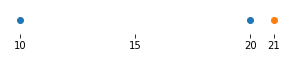

In [45]:
x = [10, 20]
y = [0] * len(x)

fig = plt.figure(figsize=(5, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
ax.set_xticks([10, 15, 20, 21])
plt.scatter(x, y)
plt.scatter([21], [0])

plt.savefig('cluster-bad.png', bbox_inches="tight")

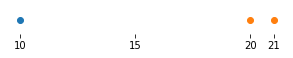

In [46]:
x = [10]
y = [0] * len(x)

fig = plt.figure(figsize=(5, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
ax.set_xticks([10, 15, 20, 21])
plt.scatter(x, y)
plt.scatter([20, 21], [0, 0])

plt.savefig('cluster-good.png', bbox_inches="tight")

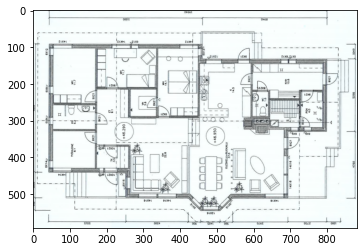

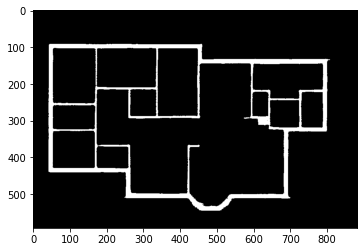

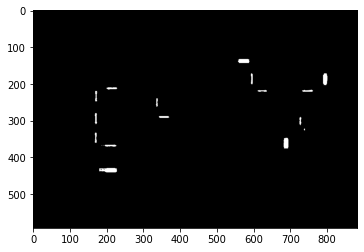

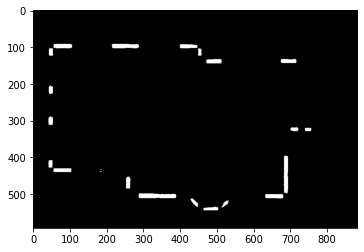

In [43]:
original = cv2.imread('original.png')
plt.imshow(original)
plt.show()

walls_closed = cv2.imread('walls.png', cv2.IMREAD_GRAYSCALE)
walls_closed = cv2.threshold(walls_closed, 0, 255, cv2.THRESH_OTSU)[1]
plt.imshow(walls_closed, cmap='gray')
plt.show()

doors_pixels = cv2.imread('doors.png', cv2.IMREAD_GRAYSCALE)
doors_pixels = cv2.threshold(doors_pixels, 0, 255, cv2.THRESH_OTSU)[1]
plt.imshow(doors_pixels, cmap='gray')
plt.show()

windows_pixels = cv2.imread('windows.png', cv2.IMREAD_GRAYSCALE)
windows_pixels = cv2.threshold(windows_pixels, 0, 255, cv2.THRESH_OTSU)[1]
plt.imshow(windows_pixels, cmap='gray')
plt.show()
##

In [4]:
## Vectorization and adding semantics
room_cnts = get_room_contours_from_wall(walls_closed)
room_cnts = simplify_contours(room_cnts)

In [16]:
walls = contours_to_walls(room_cnts,)
walls = tuple({'points': w} for w in tqdm(walls))
# walls = tuple({'points': w, 'width': calculate_width(w, walls_closed)} for w in tqdm(walls, disable=not verbose))

100%|██████████| 60/60 [00:00<00:00, 219214.49it/s]


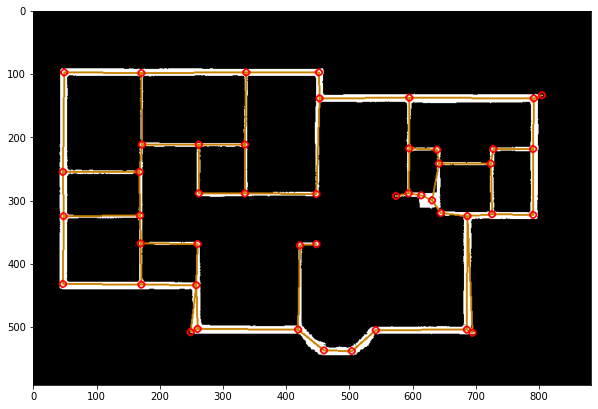

In [17]:
def show_img(im, walls=None, elements=None):
    im = np.expand_dims(im, axis=2).repeat(3, axis=2) 

    if walls:
        for w in walls:
            s, e = w['points'][0], w['points'][1]
            im = cv2.line(im, np.intp(s), np.intp(e), color=(200, 130, 0), thickness=2)
            im = cv2.circle(im, np.intp(s), color=(255, 0, 0), radius=5, thickness=2)
            im = cv2.circle(im, np.intp(e), color=(255, 0, 0), radius=5, thickness=2)

    if elements:
        for el in elements:
            s, e = el['points'][0], el['points'][1]
            ps, pe = el['perp'][0], el['perp'][1]

            color = (0, 255, 0) if el['type'] == 'window' else (0, 0, 255)
            pcolor = (50, 50, 210) if el['type'] == 'window' else (50, 210, 50) 
            im = cv2.line(im, np.intp(s), np.intp(e), color=color, thickness=2)
            im = cv2.line(im, np.intp(ps), np.intp(pe), color=pcolor, thickness=2)

    plt.figure(figsize=(10,10))
    plt.imshow(im)

show_img(walls_closed, walls)

In [18]:
doors = get_opening_lines(doors_pixels)
doors = tuple({'points': d, 'type': 'door'} for d in doors)
# FIXME: classify door as to be run after attaching to walls

windows = get_opening_lines(windows_pixels)
windows = tuple({'points': w, 'type': 'window'} for w in windows)


In [19]:
elements = tuple(el for el in doors + windows if np.linalg.norm(vector(el['points'])) > 10) 
print(len(elements))


35


{'points': array([[181. , 434.5],
       [226. , 434.5]], dtype=float32), 'type': 'door', 'perp': array([[203.5, 429.5],
       [203.5, 439.5]], dtype=float32)}


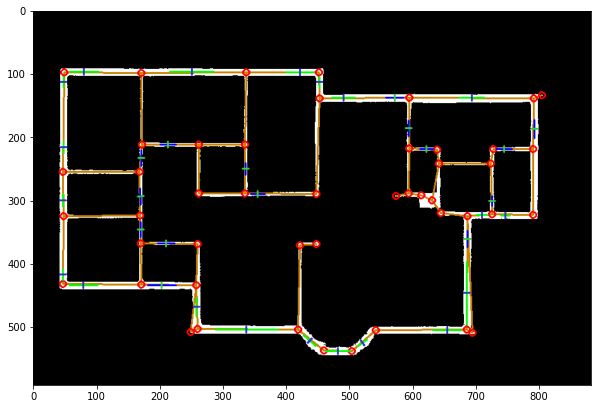

In [20]:
element_lines =  tuple({**e, 'perp': element_segment(e['points'])} for e in elements)
# element_lines =  tuple({**e, 'perp': e['points']} for e in doors + windows)
print(element_lines[0])
show_img(walls_closed, walls, element_lines)

In [21]:
walls = attach_openings(walls, elements, True)
walls

100%|██████████| 60/60 [00:00<00:00, 618.38it/s]


({'points': array([[170. , 368.5],
         [260. , 369. ]], dtype=float32),
  'elements': [{'points': array([[197., 368.],
           [224., 368.]], dtype=float32),
    'type': 'door'}]},
 {'points': array([[170. , 368.5],
         [171.5, 433.5]], dtype=float32)},
 {'points': array([[170. , 368.5],
         [169. , 324. ]], dtype=float32),
  'elements': [{'points': array([[170., 358.],
           [170., 334.]], dtype=float32),
    'type': 'door'}]},
 {'points': array([[260. , 369. ],
         [258.5, 434. ]], dtype=float32)},
 {'points': array([[258.5, 434. ],
         [171.5, 433.5]], dtype=float32),
  'elements': [{'points': array([[181. , 434.5],
           [226. , 434.5]], dtype=float32),
    'type': 'door'}]},
 {'points': array([[258.5, 434. ],
         [249. , 508. ]], dtype=float32),
  'elements': [{'points': array([[258.5, 483. ],
           [258.5, 454. ]], dtype=float32),
    'type': 'window'}]},
 {'points': array([[258.5, 434. ],
         [260. , 503. ]], dtype=float32)},


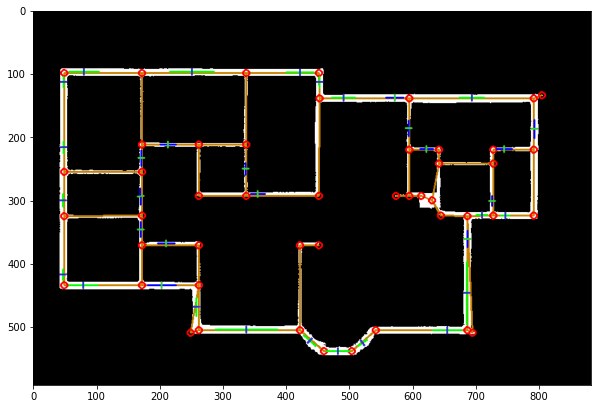

In [23]:
walls = normalize_wall_points(walls, 5)
show_img(walls_closed, walls, element_lines)

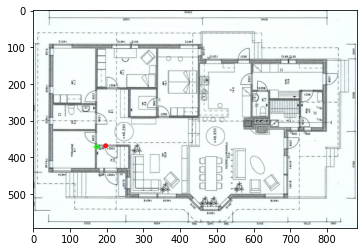

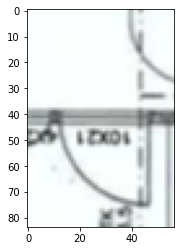

single_dr


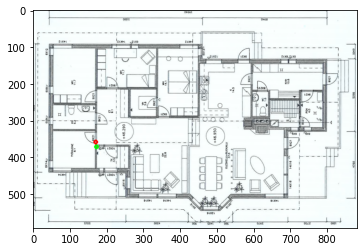

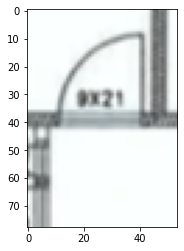

single_ur


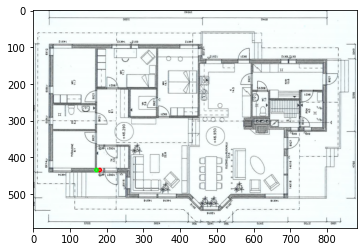

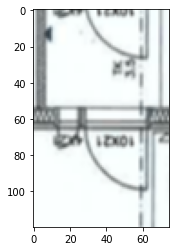

single_dr


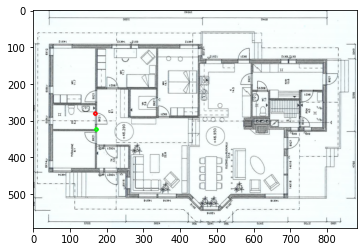

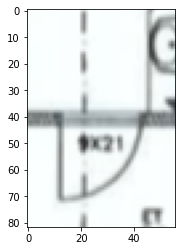

single_dl


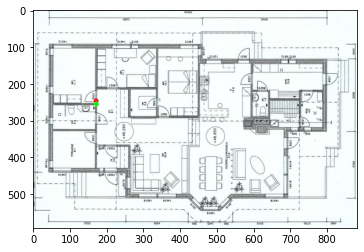

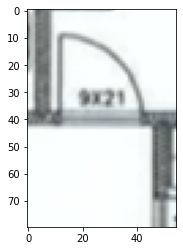

single_ul


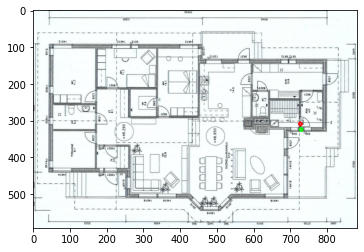

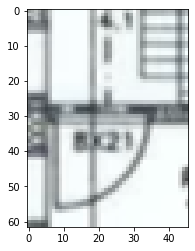

single_dl


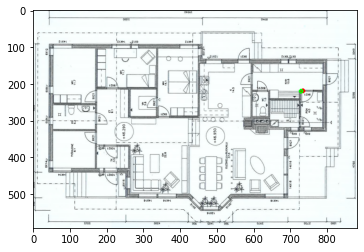

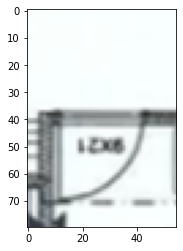

single_dl


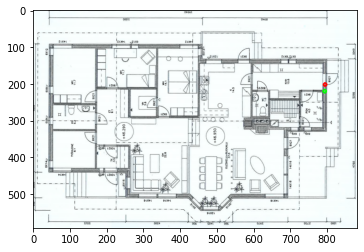

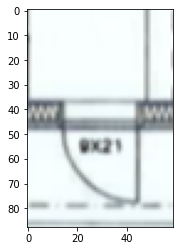

single_dr


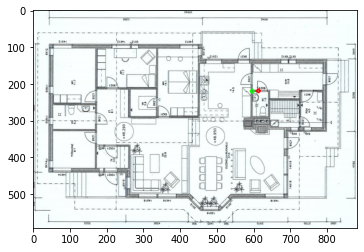

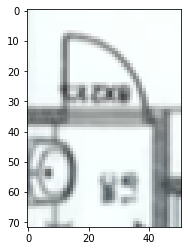

single_ul


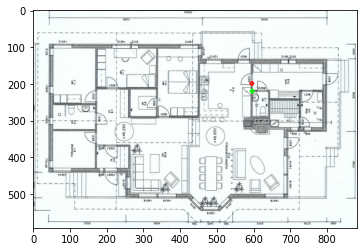

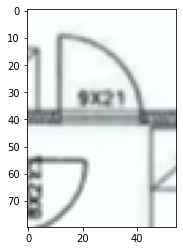

single_ul


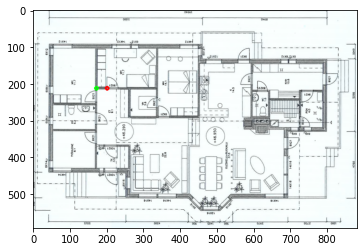

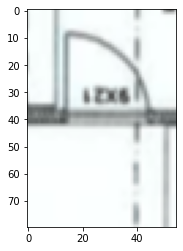

single_ul


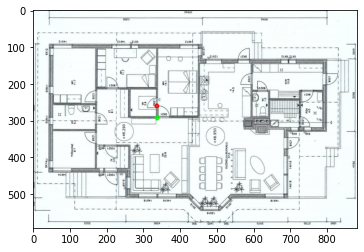

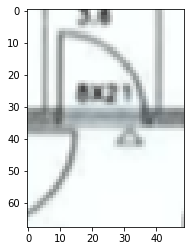

single_ul


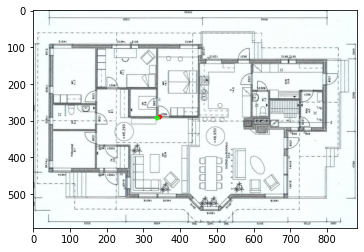

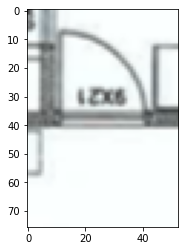

single_ul


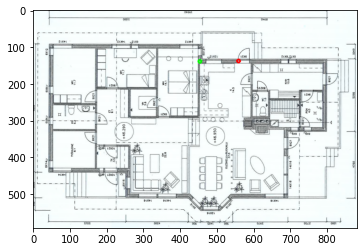

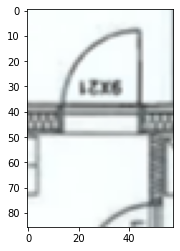

single_ur


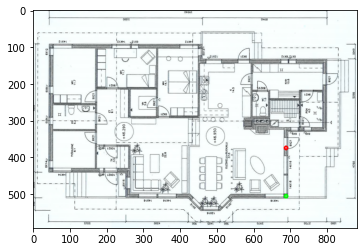

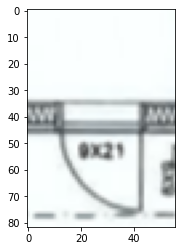

single_dr


In [24]:
from door_classification import crop_door

for wall in walls:
    if 'elements' in wall:
        for element in wall['elements']:
            if element['type'] != 'window':
                print('='*50)

                orig_img = original.copy()
                orig_img = cv2.circle(orig_img, np.intp(element['points'][0]), 4, (255, 0, 0,), 4)
                orig_img = cv2.circle(orig_img, np.intp(wall['points'][0]), 4, (0, 255, 0,), 4)
                plt.imshow(orig_img)
                plt.show()

                cropped_door = crop_door(element, wall, original)
                plt.imshow(cropped_door)
                plt.show()

                element['type'] = classify_door(element, wall, original)
                print(element['type'])

# Just call main

In [2]:
from recognition import *
import matplotlib.pyplot as plt

In [4]:
results = main()
results

2022-04-27 15:46:51,603 INFO - Performing segmentation
2022-04-27 15:47:00,043 INFO - Simplifying contours
2022-04-27 15:47:00,177 INFO - Converting polygons to walls
2022-04-27 15:47:00,823 INFO - Calculating wall width
100%|██████████| 60/60 [00:00<00:00, 613800.59it/s]
2022-04-27 15:47:00,825 INFO - Identifying wall openings and associating them with their respective walls
100%|██████████| 60/60 [00:00<00:00, 807.74it/s]
2022-04-27 15:47:00,921 INFO - Classifying doors individually
100%|██████████| 60/60 [00:00<00:00, 181.58it/s]
2022-04-27 15:47:01,254 INFO - Retrieving icons
2022-04-27 15:47:01,256 INFO - Finished


{'walls': [{'points': array([[171.5, 371.5],
          [262. , 371.5]], dtype=float32),
   'elements': [{'points': array([[197., 368.],
            [224., 368.]], dtype=float32),
     'type': 'single_dr'}]},
  {'points': array([[171.5, 434. ],
          [171.5, 371.5]], dtype=float32)},
  {'points': array([[171.5, 371.5],
          [171.5, 324. ]], dtype=float32),
   'elements': [{'points': array([[170., 358.],
            [170., 334.]], dtype=float32),
     'type': 'single_ur'}]},
  {'points': array([[262. , 434. ],
          [262. , 371.5]], dtype=float32)},
  {'points': array([[171.5, 434. ],
          [262. , 434. ]], dtype=float32),
   'elements': [{'points': array([[181. , 434.5],
            [226. , 434.5]], dtype=float32),
     'type': 'single_dr'}]},
  {'points': array([[249., 509.],
          [262., 434.]], dtype=float32),
   'elements': [{'points': array([[258.5, 483. ],
            [258.5, 454. ]], dtype=float32),
     'type': 'window'}]},
  {'points': array([[262., 505.],


In [5]:
original = cv2.imread("original.png")
im = np.full(original.shape, 255).astype(np.uint8)

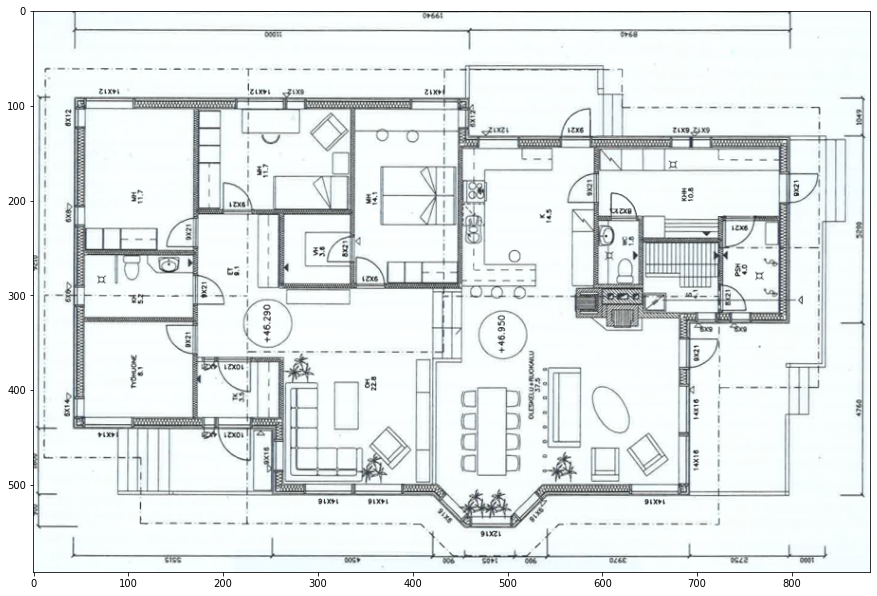

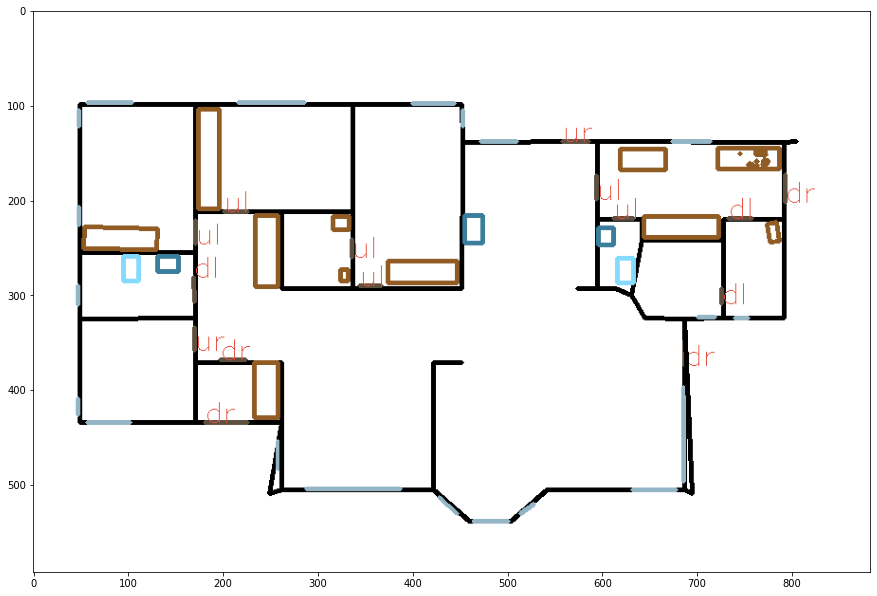

In [17]:
reconstr = im.copy()
for wall in results['walls']:
    s, e = wall['points']
    reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (0, 0, 0), 3)

    if 'elements'  in wall:
        for el in wall['elements']:
            s, e = el['points']
            if el['type'] == 'window':
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (147, 181, 198), 3)
            else:
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (94, 80, 63), 3)
                reconstr = cv2.putText(
                    reconstr, el['type'][-2:],
                    np.intp(s),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (230, 80, 63), 1, 2
                )

icons = ('closet', 'toilet', 'sink', 'bathtub')
colors = ((145, 91, 36), (133, 218, 255),  (58, 126, 156), (201, 30, 173))
for icon in results['icons']:
    # pts = np.intp(icon['points'])
    # print(pts, pts.shape, pts.reshape((-1, 1, 2)))
    reconstr = cv2.drawContours(reconstr, [np.intp(icon['points'])], 0, colors[icons.index(icon['type'])], 3)

plt.figure(figsize=(15, 15))
plt.imshow(original)

plt.figure(figsize=(15, 15))
plt.imshow(reconstr)
plt.show()

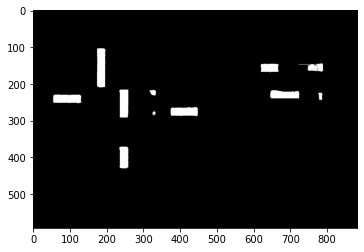

In [24]:
original = cv2.imread('original.png')
# rooms_pred, icons_pred = predict(original)

# Decorative elements
closets_pixels = as_image(icons_pred == 3)
toilets_pixels = as_image(icons_pred == 5)
sinks_pixels = as_image(icons_pred == 6)
bathtubs_pixels = as_image(icons_pred == 9)

plt.imshow(closets_pixels, cmap='gray')